In [31]:
import pandas as pd
import math
from datetime import datetime

# To count frequency in lists
import collections

# For graphing
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('/Users/yujinglai/Dropbox/Eugenie/data/raw/reviews_asin.csv')
df = pd.read_csv('/Users/yujinglai/Downloads/reviews_asin.csv')

/Users/yujinglai/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df.head()

,asin,verified,reviewText,overall,summary,unixReviewTime,reviewerName,reviewTime,vote,image
0,7391002801,True,Highly recommend!!!,5.0,Five Stars,1475884800,Michael Marone,2016-10-08,0.0,0
1,7391002801,True,great,5.0,Five Stars,1464566400,tim jensen,2016-05-30,0.0,0
2,8288878881,True,Perfect from box to phone. Only original produ...,5.0,Five Stars,1478131200,Amazon Customer,2016-11-03,0.0,0
3,8288878881,True,"I regret buying this charger. Yes, it was chea...",3.0,Get What You Pay For,1475280000,Trusted Reviewer,2016-10-01,0.0,0
4,8288878881,True,Best charger I've ever had... Love it!,5.0,Five Stars,1474243200,MOM-MOM,2016-09-19,0.0,0


In [14]:
df.shape

(2416095, 10)

In [5]:
# Drop the 'style' column for now
#df.drop(['style'], axis=1, inplace=True)

In [6]:
# Rename the original index
df.rename(columns={df.columns[0]:'index'}, inplace=True)

In [7]:
df.drop(['index'], axis=1, inplace=True)

In [8]:
def numImg(x): 
    if (type(x) is str):
        return x.count(',')
    return 0

In [9]:
df['image'] = df['image'].apply(numImg)

In [10]:
def numVote(x):
    if (type(x) is str):
        return float(int(x.replace(',', '')))
    if (math.isnan(x)):
        return 0
    return x

In [11]:
df['vote'] = df['vote'].apply(numVote)

In [12]:
df['reviewTime'] = df['reviewTime'].apply(lambda x: str(datetime.strptime(x, '%m %d, %Y').date()))

In [21]:
##### Check Amazon products' reviews #####
df.loc[df['asin'] == 'B004I8WD7S']

,asin,verified,reviewText,overall,summary,unixReviewTime,reviewerName,reviewTime,vote,image
1858855,B004I8WD7S,True,Excellent,5.0,Five Stars,1482883200,Rocco Ferri,2016-12-28,0.0,0
1858856,B004I8WD7S,True,"No brainer!!! very tight firt, and does its jo...",5.0,Five Stars,1481414400,BCS76,2016-12-11,0.0,0


In [17]:
asin = pd.read_csv('df_amazon.csv')

In [18]:
asin.head()

,Unnamed: 0,category,description,title,brand,rank,main_cat,asin,price
0,17656,"['Cell Phones & Accessories', 'Accessories']",['Compatible with AT&T Samsung Impression SGH-...,Black Rubberized Case Cover Protective SNAP-ON...,Amazon,">#846,145 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,B00286WYOY,NaN
1,22970,"['Cell Phones & Accessories', 'Cases, Holsters...",['AmazonBasics products are quality electronic...,AmazonBasics Leather Case with Swivel Clip for...,AmazonBasics,">#1,673,452 in Cell Phones & Accessories (See ...",Cell Phones & Accessories,B002VPE1NY,NaN
2,40694,"['Cell Phones & Accessories', 'Cases, Holsters...",['Translucent TPU Case with Circle pattern for...,"AmazonBasics Protective TPU Case, Clear",AmazonBasics,">#299,915 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,B004I8WD6E,NaN
3,40697,"['Cell Phones & Accessories', 'Accessories', '...",['The AmazonBasics Protective Case is made of ...,AmazonBasics Protective TPU Case with Screen P...,AmazonBasics,">#226,426 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,B004I8WD7S,$9.75
4,48966,"['Cell Phones & Accessories', 'Cases, Holsters...",['AmazonBasics products are quality electronic...,AmazonBasics Leather Case with Removable Belt ...,AmazonBasics,">#544,722 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,B004Z788JO,NaN


In [19]:
# Drop the 'style' column for now
asin.drop(asin.columns[0], axis=1, inplace=True)

In [20]:
len(set(list(asin['asin'])))

47

In [25]:
df_merged = pd.merge(df, asin, on='asin')

In [26]:
len(set(list(df_merged['asin'])))

26

In [27]:
df_merged.head()

,asin,verified,reviewText,overall,summary,unixReviewTime,reviewerName,reviewTime,vote,image,category,description,title,brand,rank,main_cat,price
0,B00511PS3C,True,broke within 2 weeks,1.0,One Star,1489968000,vanessa Harvey,2017-03-20,0.0,0,"['Cell Phones & Accessories', 'Accessories', '...",['Power two 5V accessories at the same time. F...,AmazonBasics 2-Port USB Car Charger with 2.1 A...,AmazonBasics,">#135,565 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,NaN
1,B00511PS3C,True,awesome I have two Power sights in front on my...,5.0,awesome I have two Power sights in front on my...,1487721600,Hillbilly Dreamer,2017-02-22,0.0,0,"['Cell Phones & Accessories', 'Accessories', '...",['Power two 5V accessories at the same time. F...,AmazonBasics 2-Port USB Car Charger with 2.1 A...,AmazonBasics,">#135,565 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,NaN
2,B00511PS3C,True,What else is there really to know? It works,5.0,It works,1486339200,Nick,2017-02-06,0.0,0,"['Cell Phones & Accessories', 'Accessories', '...",['Power two 5V accessories at the same time. F...,AmazonBasics 2-Port USB Car Charger with 2.1 A...,AmazonBasics,">#135,565 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,NaN
3,B00511PS3C,True,"Love amazon basic products, this is currently ...",4.0,Love amazon basic products,1486166400,wakari,2017-02-04,0.0,0,"['Cell Phones & Accessories', 'Accessories', '...",['Power two 5V accessories at the same time. F...,AmazonBasics 2-Port USB Car Charger with 2.1 A...,AmazonBasics,">#135,565 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,NaN
4,B00511PS3C,True,Love this. It is great. It works great.,5.0,Great!!!,1485216000,Amazon Customer,2017-01-24,0.0,0,"['Cell Phones & Accessories', 'Accessories', '...",['Power two 5V accessories at the same time. F...,AmazonBasics 2-Port USB Car Charger with 2.1 A...,AmazonBasics,">#135,565 in Cell Phones & Accessories (See To...",Cell Phones & Accessories,NaN


In [29]:
df_merged.shape

(1685, 17)

In [44]:
# Count the frequency of each subcategory in the list
asin_count = list(df_merged['title'])
counter_asin = collections.Counter(asin_count) # dict ordered by freq
counter_asin = {k: v for k, v in counter_asin.items() if v > 10} # Drop products with less than 10 reviews
counter_asin = {k: v for k, v in sorted(counter_asin.items(), key=lambda item: item[1])}

Text(0,0.5,'Product title')

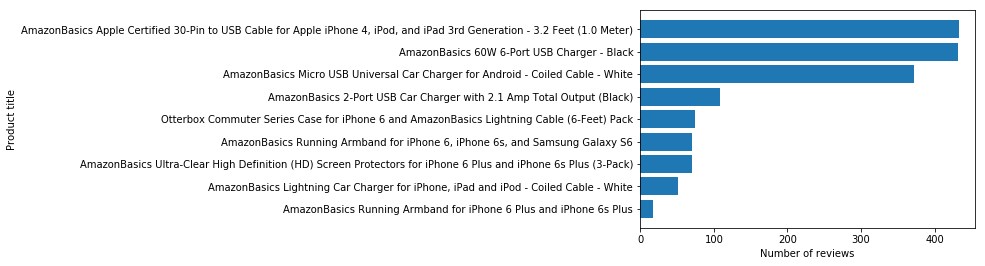

In [45]:
# Plot title vs. number of reviews
plt.barh(list(counter_asin.keys()), list(counter_asin.values()))
plt.xlabel("Number of reviews")
plt.ylabel("Product title")

In [81]:
df_merged['rank'] = df_merged['rank'].apply(lambda x: int(x))

In [84]:
df_merged.to_csv('reviews_merged.csv')